In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

In [ ]:
ms = yf.download('MSFT',
            start="2012-01-01",
            end="2021-12-31",
            progress=False)
df = ms[["Adj Close", "Open", "Close", "High", "Low"]].round(3)
df.head(10)

,Adj Close,Open,Close,High,Low
Date,,,,,
2012-01-03,21.573,26.55,26.77,26.96,26.39
2012-01-04,22.081,26.82,27.40,27.47,26.78
2012-01-05,22.306,27.38,27.68,27.73,27.29
2012-01-06,22.653,27.53,28.11,28.19,27.53
2012-01-09,22.355,28.05,27.74,28.10,27.72
2012-01-10,22.435,27.93,27.84,28.15,27.75
2012-01-11,22.338,27.43,27.72,27.98,27.37
2012-01-12,22.564,27.87,28.00,28.02,27.65
2012-01-13,22.766,27.93,28.25,28.25,27.79


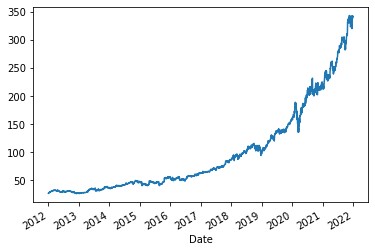

In [ ]:
df.Close.plot()

In [ ]:
df.shape

(2516, 5)

In [ ]:
df[:"2020"].Close.values.reshape(-1, 1).shape

(2265, 1)

In [ ]:
df["2021":].Close.values.shape

(251,)

In [ ]:
def ts_data(df, X_steps, y_steps):
  train_df = df[:"2020"].Close.values.reshape(-1, 1)
  test_df = df["2021":].Close.values.reshape(-1, 1)

  sc = MinMaxScaler(feature_range=(0, 1))
  train_df_scaled = sc.fit_transform(train_df)

  X_train = []
  y_train = []
  for i in range(X_steps, len(train_df_scaled)-y_steps+1):
    X_train.append(train_df_scaled[i-X_steps:i, 0])
    y_train.append(train_df_scaled[i:i+y_steps, 0])
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

  X = df.Close.values
  X = X[len(X)-len(test_df)-X_steps:]
  X = X.reshape(-1, 1)
  X = sc.transform(X)

  X_test = []
  y_test = []
  for i in range(X_steps, len(test_df)+X_steps-y_steps+1):
    X_test.append(X[i-X_steps:i, 0])
    y_test.append(X[i:i+y_steps, 0])

  X_test = np.array(X_test)
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
  y_test = np.array(y_test)

  return X_train, y_train, X_test, y_test, sc

In [ ]:
df[:"2020"].Close.values.reshape(-1, 1).shape

(2265, 1)

In [ ]:
X_train, y_train, X_test, y_test, sc = ts_data(df, 6, 2)

In [ ]:
X_train.shape

(2258, 6, 1)

In [ ]:
y_train.shape

(2258, 2)

In [ ]:
X_test.shape

(250, 6, 1)

In [ ]:
y_test.shape

(250, 2)

In [ ]:
df.head(10)

,Adj Close,Open,Close,High,Low
Date,,,,,
2012-01-03,21.573,26.55,26.77,26.96,26.39
2012-01-04,22.081,26.82,27.40,27.47,26.78
2012-01-05,22.306,27.38,27.68,27.73,27.29
2012-01-06,22.653,27.53,28.11,28.19,27.53
2012-01-09,22.355,28.05,27.74,28.10,27.72
2012-01-10,22.435,27.93,27.84,28.15,27.75
2012-01-11,22.338,27.43,27.72,27.98,27.37
2012-01-12,22.564,27.87,28.00,28.02,27.65
2012-01-13,22.766,27.93,28.25,28.25,27.79


# SimpleRNN-Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
simple_rnn_model = Sequential([
                               SimpleRNN(50, return_sequences=True),
                               SimpleRNN(50),
                               Dense(2)
                              ])

In [ ]:
simple_rnn_model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
simple_rnn_model.fit(X_train, y_train, epochs=100, validation_split=0.15)

Epoch 1/100
60/60 [==============================] - 2s 12ms/step - loss: 0.0041 - val_loss: 0.0328
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 1.8630e-04 - val_loss: 0.0218
Epoch 3/100
60/60 [==============================] - 0s 7ms/step - loss: 1.5327e-04 - val_loss: 0.0174
Epoch 4/100
60/60 [==============================] - 0s 7ms/step - loss: 1.2795e-04 - val_loss: 0.0143
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 1.1282e-04 - val_loss: 0.0122
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 9.5332e-05 - val_loss: 0.0104
Epoch 7/100
60/60 [==============================] - 0s 7ms/step - loss: 8.2937e-05 - val_loss: 0.0078
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 7.3425e-05 - val_loss: 0.0045
Epoch 9/100
60/60 [==============================] - 0s 7ms/step - loss: 7.0239e-05 - val_loss: 0.0038
Epoch 10/100
60/60 [==============================] - 0s 7ms/step - loss: 6.

In [ ]:
df["2021":].index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [ ]:
simple_rnn_pred = simple_rnn_model.predict(X_test)
simple_rnn_pred.shape

(249, 2)

In [ ]:
def prediction_plot(predictions):
  fig, ax = plt.subplots()
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(predictions[:, 0].reshape(-1, 1)), label="Prediction")

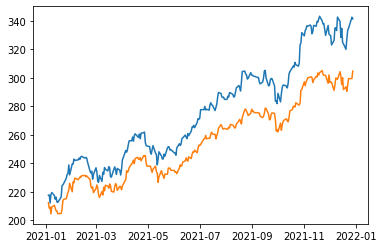

In [ ]:
prediction_plot(simple_rnn_pred)

# LSTM

In [ ]:
from keras.layers import LSTM

In [ ]:
lstm = Sequential([
                    LSTM(50, return_sequences=True),
                    LSTM(50),
                    Dense(2)
                  ])

In [ ]:
lstm.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
lstm.fit(X_train, y_train, epochs=100, validation_split=0.15)

Epoch 1/100
60/60 [==============================] - 12s 53ms/step - loss: 0.0066 - val_loss: 0.0098
Epoch 2/100
60/60 [==============================] - 1s 20ms/step - loss: 1.1048e-04 - val_loss: 0.0051
Epoch 3/100
60/60 [==============================] - 1s 18ms/step - loss: 9.0516e-05 - val_loss: 0.0018
Epoch 4/100
60/60 [==============================] - 1s 22ms/step - loss: 7.6816e-05 - val_loss: 9.9050e-04
Epoch 5/100
60/60 [==============================] - 1s 22ms/step - loss: 7.0077e-05 - val_loss: 9.1983e-04
Epoch 6/100
60/60 [==============================] - 1s 19ms/step - loss: 6.5972e-05 - val_loss: 0.0013
Epoch 7/100
60/60 [==============================] - 1s 23ms/step - loss: 7.1923e-05 - val_loss: 0.0011
Epoch 8/100
60/60 [==============================] - 1s 13ms/step - loss: 6.9183e-05 - val_loss: 0.0018
Epoch 9/100
60/60 [==============================] - 1s 10ms/step - loss: 6.4843e-05 - val_loss: 0.0013
Epoch 10/100
60/60 [==============================] - 1s 10

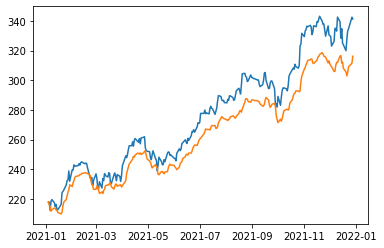

In [ ]:
prediction_plot(lstm.predict(X_test))

# GluonTS

In [ ]:
!pip install gluonts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 8.5 MB/s 
     |████████████████████████████████| 11.1 MB 24.3 MB/s 


In [ ]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 179 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
import gluonts
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [ ]:
df

,Adj Close,Open,Close,High,Low
Date,,,,,
2012-01-03,21.573,26.55,26.77,26.96,26.39
2012-01-04,22.081,26.82,27.40,27.47,26.78
2012-01-05,22.306,27.38,27.68,27.73,27.29
2012-01-06,22.653,27.53,28.11,28.19,27.53
2012-01-09,22.355,28.05,27.74,28.10,27.72
...,...,...,...,...,...
2021-12-23,333.223,332.75,334.69,336.39,332.73
2021-12-27,340.949,335.46,342.45,342.48,335.43
2021-12-28,339.755,343.15,341.25,343.81,340.32


In [ ]:
train_data = ListDataset(
    [{"start":df.index[0], "target":df.Close[:"2020"]}],
    freq="D"
)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future versi

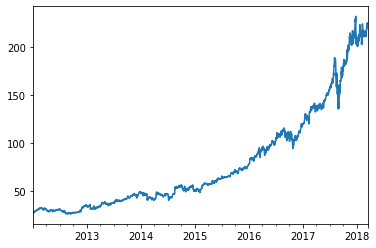

In [ ]:
train_listData = next(iter(train_data))
train_series = to_pandas(train_listData)
train_series.plot()

In [ ]:
test_data = ListDataset(
    [{"start":df.index[0], "target":df.Close}],
    freq="D"
)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


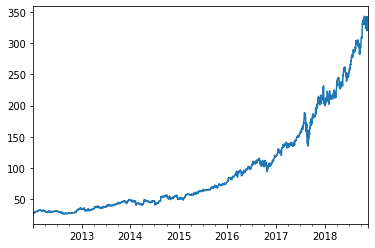

In [ ]:
test_listData = next(iter(test_data))
test_series = to_pandas(test_listData)
test_series.plot()

In [ ]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer.learning_rate_scheduler import LearningRateReduction
from gluonts.mx.trainer.model_averaging import ModelAveraging, SelectNBestMean
from gluonts.mx.trainer import Trainer

In [ ]:
callbacks = [
      LearningRateReduction(objective="min",
                            patience=10,
                            base_lr=1e-3,
                            decay_factor=0.5),
      ModelAveraging(avg_strategy=SelectNBestMean(num_models=2))   
]

In [ ]:
deepAR_model = DeepAREstimator(
    freq="D",
    prediction_length=5,
    context_length=10,
    num_layers=4,
    num_cells=100,
    dropout_rate=0.05,
    trainer=Trainer(epochs=10, callbacks=callbacks)
)

In [ ]:
deepAR_model_predictator = deepAR_model.train(train_data)

/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base = start.freq.base
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:386: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if self._full_range_date_features is not None
  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base is None or self._freq_base == start.freq.base
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be remove

In [ ]:
from gluonts.evaluation import make_evaluation_predictions

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=deepAR_model_predictator,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base is None or self._freq_base == start.freq.base
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:386: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if self._full_range_date_features is not None


In [ ]:
ts_entry = tss[0]

In [ ]:
forecast_entry = forecasts[0]

In [ ]:
forecast_entry.samples.shape

(100, 5)

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 5
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")

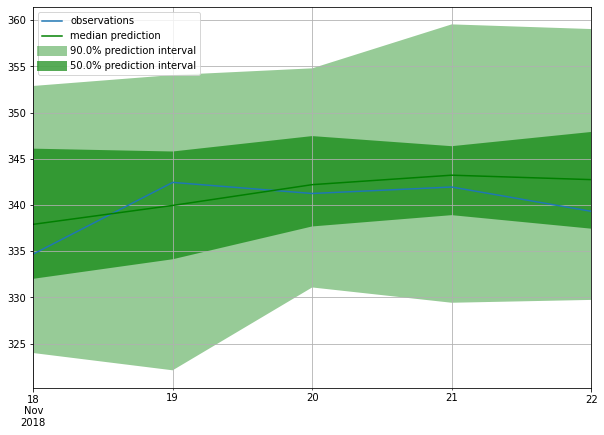

In [ ]:
plot_prob_forecasts(ts_entry, forecast_entry)

# Darts

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import darts

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import darts.utils.timeseries_generation as tg 
from darts.models import RNNModel
from darts.utils.likelihood_models import GaussianLikelihood
from darts.datasets import EnergyDataset, AirPassengersDataset
from darts.dataprocessing.transformers import Scaler
from darts.utils.missing_values import fill_missing_values
from darts import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries

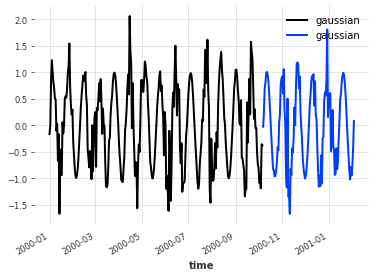

In [ ]:
signal_length = 400
signal_trend = tg.linear_timeseries(length=signal_length, end_value=4)
sine_signal = tg.sine_timeseries(length=signal_length,
                                 value_frequency=0.05,
                                 value_amplitude=1.0)
noise = tg.gaussian_timeseries(length=signal_length, std=0.5)
noise_sine = (tg.sine_timeseries(length=signal_length, value_frequency=0.02)+
              tg.constant_timeseries(length=signal_length, value=1))/2 
noise = noise*noise_sine
target_series = sum([noise, sine_signal])
target_train, target_val = target_series.split_after(0.7)
target_train.plot()
target_val.plot()

In [ ]:
rnn_model = RNNModel(
    model="LSTM",
    hidden_dim=20,
    n_rnn_layers=1,
    dropout=0,
    n_epochs=15,
    optimizer_kwargs={"lr":1e-3},
    input_chunk_length=20,
    training_length=50,
    likelihood=GaussianLikelihood(),

)

In [ ]:
rnn_model.fit(target_train)

[2022-06-11 07:24:03,832] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 230 samples.
[2022-06-11 07:24:03,832] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 230 samples.
2022-06-11 07:24:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 230 samples.
[2022-06-11 07:24:03,849] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-06-11 07:24:03,849] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-06-11 07:24:03 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-06-11 07:24:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-11 07:24:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-11 07:24:03 pytorch_l

Training: 0it [00:00, ?it/s]

In [ ]:
rnn_model.predict(50, num_samples=50)

Predicting: 8it [00:00, ?it/s]

<TimeSeries (DataArray) (time: 50, component: 1, sample: 50)>
array([[[ 0.11272113, -0.06007121,  0.15693691, ...,  0.08833677,
          0.20665441, -0.18131087]],

       [[ 0.38221569,  0.38259219,  0.43442695, ...,  0.31488236,
          0.32723275,  0.38280655]],

       [[ 0.57554888,  0.55341125,  0.60563389, ...,  0.42034418,
          0.66460761,  0.58500134]],

       ...,

       [[ 1.01727356,  0.6973339 ,  0.90856759, ...,  0.84539333,
          0.64923177,  0.68966011]],

       [[ 0.70670441,  0.64938428,  0.60702781, ...,  0.6905202 ,
          0.3611428 ,  0.67841975]],

       [[ 0.04136603,  0.22534499,  0.31018969, ...,  0.38171559,
          0.10802338,  0.0586981 ]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-10-07 2000-10-08 ... 2000-11-25
  * component  (component) object 'gaussian'
Dimensions without coordinates: sample

Predicting: 8it [00:00, ?it/s]

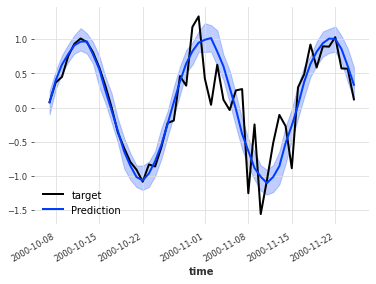

In [ ]:
pred = rnn_model.predict(50, num_samples=50)
target_val.slice_intersect(pred).plot(label="target")
pred.plot(label="Prediction")

In [ ]:
from darts.metrics import mae

In [ ]:
mae(target_val, pred)

0.22944163532168685

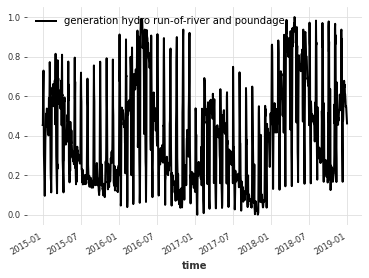

In [ ]:
energy_df = EnergyDataset().load().pd_dataframe()
energy_df_daily = energy_df.groupby(energy_df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
energy_ts = fill_missing_values(
    TimeSeries.from_dataframe(energy_df_daily,
                              "time",
                              ["generation hydro run-of-river and poundage"]),
    "auto")
energy_ts = energy_ts.astype(np.float32)

scaler_ts = Scaler()
energy_ts_transformed = scaler_ts.fit_transform(energy_ts)
train_ts, val_ts = energy_ts_transformed.split_after(pd.Timestamp("20170901"))
energy_ts_transformed.plot()

In [ ]:
fut_cov = datetime_attribute_timeseries(
    energy_ts_transformed, attribute="day", one_hot=True, dtype=np.float32
)

In [ ]:
scaler_cov = Scaler()
fut_cov_transformed = scaler_cov.fit_transform(fut_cov)
train_cov, val_cov = fut_cov_transformed.split_after(pd.Timestamp("20170901"))

In [ ]:
energy_rnn_model = RNNModel(
    model="LSTM",
    hidden_dim=10,
    n_rnn_layers=2,
    n_epochs=10,
    training_length=300,
    input_chunk_length=300,
    likelihood=GaussianLikelihood()
)

In [ ]:
energy_rnn_model.fit(series=train_ts, future_covariates=train_cov)

[2022-06-13 13:45:26,644] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 676 samples.
[2022-06-13 13:45:26,644] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 676 samples.
2022-06-13 13:45:26 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 676 samples.
[2022-06-13 13:45:26,700] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-06-13 13:45:26,700] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
2022-06-13 13:45:26 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-06-13 13:45:26 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:45:26 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:45:26 pytorch_l

Training: 0it [00:00, ?it/s]

In [ ]:
hist_forecast_energy = energy_rnn_model.historical_forecasts(
    series=energy_ts_transformed,
    future_covariates=fut_cov_transformed,
    num_samples=50,
    start=0.7,
    forecast_horizon=30,
    stride=5
)

[2022-06-13 13:46:12,028] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 722 samples.
[2022-06-13 13:46:12,028] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 722 samples.
2022-06-13 13:46:12 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 722 samples.
2022-06-13 13:46:12 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:46:12 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:46:12 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:46:12 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:46:12,054] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 23it [00:00, ?it/s]

[2022-06-13 13:46:52,463] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 727 samples.
[2022-06-13 13:46:52,463] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 727 samples.
2022-06-13 13:46:52 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 727 samples.
2022-06-13 13:46:52 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:46:52 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:46:52 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:46:52 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:46:52,490] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 23it [00:00, ?it/s]

[2022-06-13 13:47:31,198] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 732 samples.
[2022-06-13 13:47:31,198] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 732 samples.
2022-06-13 13:47:31 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 732 samples.
2022-06-13 13:47:31 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:47:31 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:47:31 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:47:31 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:47:31,223] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 23it [00:00, ?it/s]

[2022-06-13 13:48:10,603] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 737 samples.
[2022-06-13 13:48:10,603] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 737 samples.
2022-06-13 13:48:10 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 737 samples.
2022-06-13 13:48:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:48:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:48:10 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:48:10 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:48:10,627] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 24it [00:00, ?it/s]

[2022-06-13 13:48:50,115] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 742 samples.
[2022-06-13 13:48:50,115] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 742 samples.
2022-06-13 13:48:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 742 samples.
2022-06-13 13:48:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:48:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:48:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:48:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:48:50,140] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 24it [00:00, ?it/s]

[2022-06-13 13:49:30,041] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 747 samples.
[2022-06-13 13:49:30,041] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 747 samples.
2022-06-13 13:49:30 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 747 samples.
2022-06-13 13:49:30 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:49:30 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:49:30 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:49:30 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:49:30,066] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 24it [00:00, ?it/s]

[2022-06-13 13:50:09,740] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 752 samples.
[2022-06-13 13:50:09,740] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 752 samples.
2022-06-13 13:50:09 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 752 samples.
2022-06-13 13:50:09 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:50:09 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:50:09 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:50:09 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:50:09,764] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 24it [00:00, ?it/s]

[2022-06-13 13:50:49,660] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 757 samples.
[2022-06-13 13:50:49,660] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 757 samples.
2022-06-13 13:50:49 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 757 samples.
2022-06-13 13:50:49 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:50:49 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:50:49 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:50:49 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:50:49,692] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 24it [00:00, ?it/s]

[2022-06-13 13:51:29,741] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 762 samples.
[2022-06-13 13:51:29,741] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 762 samples.
2022-06-13 13:51:29 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 762 samples.
2022-06-13 13:51:29 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:51:29 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:51:29 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:51:29 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:51:29,768] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 24it [00:00, ?it/s]

[2022-06-13 13:52:09,820] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 767 samples.
[2022-06-13 13:52:09,820] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 767 samples.
2022-06-13 13:52:09 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 767 samples.
2022-06-13 13:52:09 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:52:09 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:52:09 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:52:09 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:52:09,844] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 24it [00:00, ?it/s]

[2022-06-13 13:52:49,937] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 772 samples.
[2022-06-13 13:52:49,937] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 772 samples.
2022-06-13 13:52:49 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 772 samples.
2022-06-13 13:52:49 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:52:49 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:52:49 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:52:49 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:52:49,967] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

[2022-06-13 13:53:32,470] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 777 samples.
[2022-06-13 13:53:32,470] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 777 samples.
2022-06-13 13:53:32 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 777 samples.
2022-06-13 13:53:32 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:53:32 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:53:32 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:53:32 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:53:32,494] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

[2022-06-13 13:54:14,216] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 782 samples.
[2022-06-13 13:54:14,216] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 782 samples.
2022-06-13 13:54:14 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 782 samples.
2022-06-13 13:54:14 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:54:14 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:54:14 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:54:14 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:54:14,244] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

[2022-06-13 13:54:55,997] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 787 samples.
[2022-06-13 13:54:55,997] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 787 samples.
2022-06-13 13:54:55 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 787 samples.
2022-06-13 13:54:56 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:54:56 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:54:56 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:54:56 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:54:56,029] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

[2022-06-13 13:55:39,510] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 792 samples.
[2022-06-13 13:55:39,510] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 792 samples.
2022-06-13 13:55:39 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 792 samples.
2022-06-13 13:55:39 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:55:39 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:55:39 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:55:39 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:55:39,538] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

[2022-06-13 13:56:21,368] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 797 samples.
[2022-06-13 13:56:21,368] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 797 samples.
2022-06-13 13:56:21 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 797 samples.
2022-06-13 13:56:21 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:56:21 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:56:21 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:56:21 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:56:21,397] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

[2022-06-13 13:57:03,134] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 802 samples.
[2022-06-13 13:57:03,134] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 802 samples.
2022-06-13 13:57:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 802 samples.
2022-06-13 13:57:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:57:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:57:03 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:57:03 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:57:03,157] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

[2022-06-13 13:57:46,426] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 807 samples.
[2022-06-13 13:57:46,426] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 807 samples.
2022-06-13 13:57:46 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 807 samples.
2022-06-13 13:57:46 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:57:46 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:57:46 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:57:46 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:57:46,452] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

[2022-06-13 13:58:29,485] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 812 samples.
[2022-06-13 13:58:29,485] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 812 samples.
2022-06-13 13:58:29 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 812 samples.
2022-06-13 13:58:29 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:58:29 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:58:29 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:58:29 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:58:29,520] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

[2022-06-13 13:59:14,198] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 817 samples.
[2022-06-13 13:59:14,198] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 817 samples.
2022-06-13 13:59:14 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 817 samples.
2022-06-13 13:59:14 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:59:14 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:59:14 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:59:14 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:59:14,225] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

[2022-06-13 13:59:57,858] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 822 samples.
[2022-06-13 13:59:57,858] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 822 samples.
2022-06-13 13:59:57 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 822 samples.
2022-06-13 13:59:57 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 13:59:57 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 13:59:57 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 13:59:57 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 13:59:57,887] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

[2022-06-13 14:00:41,742] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 827 samples.
[2022-06-13 14:00:41,742] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 827 samples.
2022-06-13 14:00:41 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 827 samples.
2022-06-13 14:00:41 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:00:41 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:00:41 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:00:41 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:00:41,768] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

[2022-06-13 14:01:25,782] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 832 samples.
[2022-06-13 14:01:25,782] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 832 samples.
2022-06-13 14:01:25 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 832 samples.
2022-06-13 14:01:25 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:01:25 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:01:25 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:01:25 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:01:25,809] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

[2022-06-13 14:02:09,522] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 837 samples.
[2022-06-13 14:02:09,522] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 837 samples.
2022-06-13 14:02:09 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 837 samples.
2022-06-13 14:02:09 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:02:09 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:02:09 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:02:09 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:02:09,549] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

[2022-06-13 14:02:54,349] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 842 samples.
[2022-06-13 14:02:54,349] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 842 samples.
2022-06-13 14:02:54 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 842 samples.
2022-06-13 14:02:54 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:02:54 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:02:54 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:02:54 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:02:54,372] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

[2022-06-13 14:03:39,525] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 847 samples.
[2022-06-13 14:03:39,525] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 847 samples.
2022-06-13 14:03:39 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 847 samples.
2022-06-13 14:03:39 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:03:39 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:03:39 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:03:39 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:03:39,548] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

[2022-06-13 14:04:25,886] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 852 samples.
[2022-06-13 14:04:25,886] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 852 samples.
2022-06-13 14:04:25 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 852 samples.
2022-06-13 14:04:25 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:04:25 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:04:25 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:04:25 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:04:25,916] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

[2022-06-13 14:05:11,682] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 857 samples.
[2022-06-13 14:05:11,682] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 857 samples.
2022-06-13 14:05:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 857 samples.
2022-06-13 14:05:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:05:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:05:11 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:05:11 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:05:11,709] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

[2022-06-13 14:05:57,076] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 862 samples.
[2022-06-13 14:05:57,076] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 862 samples.
2022-06-13 14:05:57 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 862 samples.
2022-06-13 14:05:57 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:05:57 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:05:57 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:05:57 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:05:57,101] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 27it [00:00, ?it/s]

[2022-06-13 14:06:42,637] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 867 samples.
[2022-06-13 14:06:42,637] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 867 samples.
2022-06-13 14:06:42 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 867 samples.
2022-06-13 14:06:42 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:06:42 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:06:42 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:06:42 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:06:42,666] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 28it [00:00, ?it/s]

[2022-06-13 14:07:29,578] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 872 samples.
[2022-06-13 14:07:29,578] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 872 samples.
2022-06-13 14:07:29 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 872 samples.
2022-06-13 14:07:29 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:07:29 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:07:29 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:07:29 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:07:29,611] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 28it [00:00, ?it/s]

[2022-06-13 14:08:16,697] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 877 samples.
[2022-06-13 14:08:16,697] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 877 samples.
2022-06-13 14:08:16 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 877 samples.
2022-06-13 14:08:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:08:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:08:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:08:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:08:16,721] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 28it [00:00, ?it/s]

[2022-06-13 14:09:03,868] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 882 samples.
[2022-06-13 14:09:03,868] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 882 samples.
2022-06-13 14:09:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 882 samples.
2022-06-13 14:09:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:09:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:09:03 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:09:03 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:09:03,902] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 28it [00:00, ?it/s]

[2022-06-13 14:09:51,992] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 887 samples.
[2022-06-13 14:09:51,992] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 887 samples.
2022-06-13 14:09:51 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 887 samples.
2022-06-13 14:09:52 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:09:52 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:09:52 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:09:52 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:09:52,016] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 28it [00:00, ?it/s]

[2022-06-13 14:10:39,473] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 892 samples.
[2022-06-13 14:10:39,473] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 892 samples.
2022-06-13 14:10:39 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 892 samples.
2022-06-13 14:10:39 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:10:39 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:10:39 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:10:39 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:10:39,497] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 28it [00:00, ?it/s]

[2022-06-13 14:11:26,959] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 897 samples.
[2022-06-13 14:11:26,959] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 897 samples.
2022-06-13 14:11:26 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 897 samples.
2022-06-13 14:11:26 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:11:26 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:11:26 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:11:26 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:11:26,982] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 29it [00:00, ?it/s]

[2022-06-13 14:12:15,581] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 902 samples.
[2022-06-13 14:12:15,581] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 902 samples.
2022-06-13 14:12:15 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 902 samples.
2022-06-13 14:12:15 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:12:15 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:12:15 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:12:15 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:12:15,605] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 29it [00:00, ?it/s]

[2022-06-13 14:13:04,216] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 907 samples.
[2022-06-13 14:13:04,216] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 907 samples.
2022-06-13 14:13:04 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 907 samples.
2022-06-13 14:13:04 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:13:04 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:13:04 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:13:04 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:13:04,238] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 29it [00:00, ?it/s]

[2022-06-13 14:13:53,210] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 912 samples.
[2022-06-13 14:13:53,210] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 912 samples.
2022-06-13 14:13:53 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 912 samples.
2022-06-13 14:13:53 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:13:53 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:13:53 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:13:53 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:13:53,235] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 29it [00:00, ?it/s]

[2022-06-13 14:14:41,938] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 917 samples.
[2022-06-13 14:14:41,938] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 917 samples.
2022-06-13 14:14:41 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 917 samples.
2022-06-13 14:14:41 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:14:41 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:14:41 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:14:41 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:14:41,959] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 29it [00:00, ?it/s]

[2022-06-13 14:15:31,611] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 922 samples.
[2022-06-13 14:15:31,611] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 922 samples.
2022-06-13 14:15:31 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 922 samples.
2022-06-13 14:15:31 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:15:31 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:15:31 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:15:31 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:15:31,645] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 29it [00:00, ?it/s]

[2022-06-13 14:16:20,378] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 927 samples.
[2022-06-13 14:16:20,378] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 927 samples.
2022-06-13 14:16:20 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 927 samples.
2022-06-13 14:16:20 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:16:20 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:16:20 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:16:20 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:16:20,401] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 29it [00:00, ?it/s]

[2022-06-13 14:17:09,474] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 932 samples.
[2022-06-13 14:17:09,474] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 932 samples.
2022-06-13 14:17:09 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 932 samples.
2022-06-13 14:17:09 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:17:09 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:17:09 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:17:09 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:17:09,497] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 30it [00:00, ?it/s]

[2022-06-13 14:17:59,840] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 937 samples.
[2022-06-13 14:17:59,840] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 937 samples.
2022-06-13 14:17:59 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 937 samples.
2022-06-13 14:17:59 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:17:59 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:17:59 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:17:59 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:17:59,863] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 30it [00:00, ?it/s]

[2022-06-13 14:18:50,210] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 942 samples.
[2022-06-13 14:18:50,210] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 942 samples.
2022-06-13 14:18:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 942 samples.
2022-06-13 14:18:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:18:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:18:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:18:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:18:50,241] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 30it [00:00, ?it/s]

[2022-06-13 14:19:40,658] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 947 samples.
[2022-06-13 14:19:40,658] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 947 samples.
2022-06-13 14:19:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 947 samples.
2022-06-13 14:19:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:19:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:19:40 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:19:40 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:19:40,682] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 30it [00:00, ?it/s]

[2022-06-13 14:20:32,174] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 952 samples.
[2022-06-13 14:20:32,174] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 952 samples.
2022-06-13 14:20:32 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 952 samples.
2022-06-13 14:20:32 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:20:32 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:20:32 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:20:32 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:20:32,204] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 30it [00:00, ?it/s]

[2022-06-13 14:21:22,838] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 957 samples.
[2022-06-13 14:21:22,838] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 957 samples.
2022-06-13 14:21:22 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 957 samples.
2022-06-13 14:21:22 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:21:22 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:21:22 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:21:22 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:21:22,862] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 30it [00:00, ?it/s]

[2022-06-13 14:22:13,598] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 962 samples.
[2022-06-13 14:22:13,598] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 962 samples.
2022-06-13 14:22:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 962 samples.
2022-06-13 14:22:13 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:22:13 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:22:13 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:22:13 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:22:13,622] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

[2022-06-13 14:23:05,580] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 967 samples.
[2022-06-13 14:23:05,580] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 967 samples.
2022-06-13 14:23:05 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 967 samples.
2022-06-13 14:23:05 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:23:05 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:23:05 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:23:05 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:23:05,609] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

[2022-06-13 14:23:57,801] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 972 samples.
[2022-06-13 14:23:57,801] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 972 samples.
2022-06-13 14:23:57 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 972 samples.
2022-06-13 14:23:57 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:23:57 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:23:57 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:23:57 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:23:57,826] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

[2022-06-13 14:24:50,196] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 977 samples.
[2022-06-13 14:24:50,196] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 977 samples.
2022-06-13 14:24:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 977 samples.
2022-06-13 14:24:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:24:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:24:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:24:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:24:50,222] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

[2022-06-13 14:25:43,353] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 982 samples.
[2022-06-13 14:25:43,353] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 982 samples.
2022-06-13 14:25:43 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 982 samples.
2022-06-13 14:25:43 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:25:43 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:25:43 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:25:43 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:25:43,373] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

[2022-06-13 14:26:37,190] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 987 samples.
[2022-06-13 14:26:37,190] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 987 samples.
2022-06-13 14:26:37 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 987 samples.
2022-06-13 14:26:37 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:26:37 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:26:37 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:26:37 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:26:37,216] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

[2022-06-13 14:27:30,198] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 992 samples.
[2022-06-13 14:27:30,198] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 992 samples.
2022-06-13 14:27:30 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 992 samples.
2022-06-13 14:27:30 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:27:30 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:27:30 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:27:30 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:27:30,224] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

[2022-06-13 14:28:23,194] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 997 samples.
[2022-06-13 14:28:23,194] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 997 samples.
2022-06-13 14:28:23 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 997 samples.
2022-06-13 14:28:23 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:28:23 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:28:23 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:28:23 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:28:23,218] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying

Training: 0it [00:00, ?it/s]

Predicting: 32it [00:00, ?it/s]

[2022-06-13 14:29:17,651] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1002 samples.
[2022-06-13 14:29:17,651] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1002 samples.
2022-06-13 14:29:17 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1002 samples.
2022-06-13 14:29:17 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:29:17 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:29:17 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:29:17 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:29:17,675] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 32it [00:00, ?it/s]

[2022-06-13 14:30:11,895] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1007 samples.
[2022-06-13 14:30:11,895] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1007 samples.
2022-06-13 14:30:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1007 samples.
2022-06-13 14:30:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:30:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:30:11 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:30:11 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:30:11,919] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 32it [00:00, ?it/s]

[2022-06-13 14:31:06,390] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1012 samples.
[2022-06-13 14:31:06,390] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1012 samples.
2022-06-13 14:31:06 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1012 samples.
2022-06-13 14:31:06 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:31:06 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:31:06 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:31:06 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:31:06,418] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 32it [00:00, ?it/s]

[2022-06-13 14:32:01,510] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1017 samples.
[2022-06-13 14:32:01,510] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1017 samples.
2022-06-13 14:32:01 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1017 samples.
2022-06-13 14:32:01 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:32:01 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:32:01 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:32:01 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:32:01,534] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 32it [00:00, ?it/s]

[2022-06-13 14:32:55,706] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1022 samples.
[2022-06-13 14:32:55,706] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1022 samples.
2022-06-13 14:32:55 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1022 samples.
2022-06-13 14:32:55 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:32:55 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:32:55 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:32:55 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:32:55,729] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 32it [00:00, ?it/s]

[2022-06-13 14:33:50,086] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1027 samples.
[2022-06-13 14:33:50,086] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1027 samples.
2022-06-13 14:33:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1027 samples.
2022-06-13 14:33:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:33:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:33:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:33:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:33:50,106] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 33it [00:00, ?it/s]

[2022-06-13 14:34:45,734] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1032 samples.
[2022-06-13 14:34:45,734] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1032 samples.
2022-06-13 14:34:45 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1032 samples.
2022-06-13 14:34:45 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:34:45 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:34:45 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:34:45 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:34:45,758] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 33it [00:00, ?it/s]

[2022-06-13 14:35:41,260] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1037 samples.
[2022-06-13 14:35:41,260] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1037 samples.
2022-06-13 14:35:41 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1037 samples.
2022-06-13 14:35:41 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:35:41 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:35:41 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:35:41 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:35:41,284] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 33it [00:00, ?it/s]

[2022-06-13 14:36:36,777] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1042 samples.
[2022-06-13 14:36:36,777] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1042 samples.
2022-06-13 14:36:36 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1042 samples.
2022-06-13 14:36:36 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:36:36 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:36:36 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:36:36 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:36:36,800] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 33it [00:00, ?it/s]

[2022-06-13 14:37:33,348] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1047 samples.
[2022-06-13 14:37:33,348] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1047 samples.
2022-06-13 14:37:33 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1047 samples.
2022-06-13 14:37:33 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:37:33 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:37:33 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:37:33 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:37:33,372] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 33it [00:00, ?it/s]

[2022-06-13 14:38:28,890] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1052 samples.
[2022-06-13 14:38:28,890] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1052 samples.
2022-06-13 14:38:28 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1052 samples.
2022-06-13 14:38:28 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:38:28 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:38:28 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:38:28 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:38:28,914] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 33it [00:00, ?it/s]

[2022-06-13 14:39:24,746] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1057 samples.
[2022-06-13 14:39:24,746] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1057 samples.
2022-06-13 14:39:24 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1057 samples.
2022-06-13 14:39:24 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:39:24 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:39:24 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:39:24 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:39:24,770] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 34it [00:00, ?it/s]

[2022-06-13 14:40:21,719] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1062 samples.
[2022-06-13 14:40:21,719] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1062 samples.
2022-06-13 14:40:21 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1062 samples.
2022-06-13 14:40:21 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:40:21 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:40:21 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:40:21 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:40:21,747] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 34it [00:00, ?it/s]

[2022-06-13 14:41:19,079] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1067 samples.
[2022-06-13 14:41:19,079] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1067 samples.
2022-06-13 14:41:19 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1067 samples.
2022-06-13 14:41:19 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:41:19 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:41:19 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:41:19 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:41:19,103] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 34it [00:00, ?it/s]

[2022-06-13 14:42:16,327] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1072 samples.
[2022-06-13 14:42:16,327] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1072 samples.
2022-06-13 14:42:16 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1072 samples.
2022-06-13 14:42:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:42:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:42:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:42:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:42:16,366] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 34it [00:00, ?it/s]

[2022-06-13 14:43:14,543] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1077 samples.
[2022-06-13 14:43:14,543] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1077 samples.
2022-06-13 14:43:14 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1077 samples.
2022-06-13 14:43:14 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:43:14 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:43:14 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:43:14 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:43:14,570] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 34it [00:00, ?it/s]

[2022-06-13 14:44:11,586] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1082 samples.
[2022-06-13 14:44:11,586] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1082 samples.
2022-06-13 14:44:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1082 samples.
2022-06-13 14:44:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:44:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:44:11 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:44:11 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:44:11,613] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 34it [00:00, ?it/s]

[2022-06-13 14:45:09,177] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1087 samples.
[2022-06-13 14:45:09,177] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1087 samples.
2022-06-13 14:45:09 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1087 samples.
2022-06-13 14:45:09 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:45:09 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:45:09 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:45:09 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:45:09,201] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 34it [00:00, ?it/s]

[2022-06-13 14:46:06,706] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1092 samples.
[2022-06-13 14:46:06,706] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1092 samples.
2022-06-13 14:46:06 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1092 samples.
2022-06-13 14:46:06 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:46:06 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:46:06 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:46:06 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:46:06,730] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 35it [00:00, ?it/s]

[2022-06-13 14:47:05,554] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1097 samples.
[2022-06-13 14:47:05,554] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1097 samples.
2022-06-13 14:47:05 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1097 samples.
2022-06-13 14:47:05 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:47:05 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:47:05 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:47:05 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:47:05,585] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 35it [00:00, ?it/s]

[2022-06-13 14:48:04,462] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1102 samples.
[2022-06-13 14:48:04,462] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1102 samples.
2022-06-13 14:48:04 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1102 samples.
2022-06-13 14:48:04 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:48:04 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:48:04 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:48:04 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:48:04,493] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 35it [00:00, ?it/s]

[2022-06-13 14:49:04,260] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1107 samples.
[2022-06-13 14:49:04,260] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1107 samples.
2022-06-13 14:49:04 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1107 samples.
2022-06-13 14:49:04 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:49:04 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:49:04 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:49:04 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:49:04,283] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 35it [00:00, ?it/s]

[2022-06-13 14:50:03,278] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1112 samples.
[2022-06-13 14:50:03,278] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1112 samples.
2022-06-13 14:50:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1112 samples.
2022-06-13 14:50:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:50:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:50:03 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:50:03 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:50:03,301] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 35it [00:00, ?it/s]

[2022-06-13 14:51:02,288] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1117 samples.
[2022-06-13 14:51:02,288] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1117 samples.
2022-06-13 14:51:02 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1117 samples.
2022-06-13 14:51:02 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:51:02 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:51:02 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:51:02 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:51:02,311] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 35it [00:00, ?it/s]

[2022-06-13 14:52:01,410] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1122 samples.
[2022-06-13 14:52:01,410] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1122 samples.
2022-06-13 14:52:01 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1122 samples.
2022-06-13 14:52:01 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:52:01 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:52:01 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:52:01 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:52:01,432] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 36it [00:00, ?it/s]

[2022-06-13 14:53:01,670] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1127 samples.
[2022-06-13 14:53:01,670] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1127 samples.
2022-06-13 14:53:01 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1127 samples.
2022-06-13 14:53:01 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:53:01 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:53:01 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:53:01 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:53:01,696] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 36it [00:00, ?it/s]

[2022-06-13 14:54:02,877] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1132 samples.
[2022-06-13 14:54:02,877] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1132 samples.
2022-06-13 14:54:02 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1132 samples.
2022-06-13 14:54:02 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-13 14:54:02 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-13 14:54:02 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-13 14:54:02 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-06-13 14:54:02,907] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specify

Training: 0it [00:00, ?it/s]

Predicting: 36it [00:00, ?it/s]

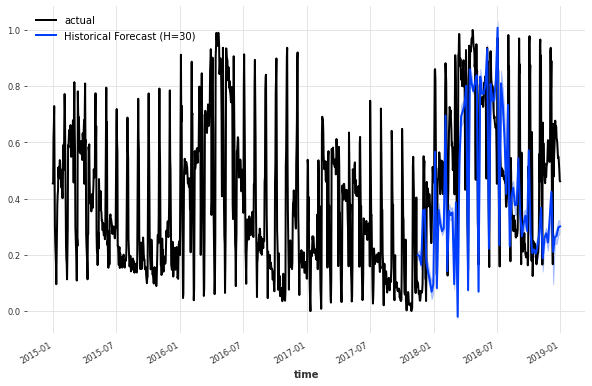

In [ ]:
plt.figure(figsize=(10, 6))
energy_ts_transformed.plot(label="actual")
hist_forecast_energy.plot(label="Historical Forecast (H=30)", low_quantile=0.01, high_quantile=0.99)
plt.legend()

# TFT

In [ ]:
airpass_ts = AirPassengersDataset().load()
airpass_ts = airpass_ts/TimeSeries.from_series(airpass_ts.time_index.days_in_month)

airpass_ts = airpass_ts.astype(np.float32)

airpass_train, air_pass_val = airpass_ts.split_after(pd.Timestamp("19571201"))

sc = Scaler()
ap_train_sc = sc.fit_transform(airpass_train)
ap_val_sc = sc.transform(air_pass_val)

airpass_ts_sc = sc.transform(airpass_ts)

cov = datetime_attribute_timeseries(airpass_ts, attribute="year", one_hot=False)
cov = cov.stack(
    datetime_attribute_timeseries(airpass_ts, attribute="month", one_hot=False)
)
cov = cov.stack(
    TimeSeries.from_times_and_values(
        times=airpass_ts.time_index,
        values=np.arange(len(airpass_ts)),

    )
)

cov = cov.astype(np.float32)

sc2 = Scaler()
cov_train, cov_val = cov.split_after(pd.Timestamp("19571201"))
sc2.fit(cov_train)
cov_sc = sc2.transform(cov)

In [ ]:
from darts.models import TFTModel

In [ ]:
tft_model = TFTModel(
    input_chunk_length=20,
    output_chunk_length=10,
    hidden_size=100,
    lstm_layers=1,
    num_attention_heads=3,
    dropout=0.1,
    n_epochs=200
)

In [ ]:
tft_model.fit(ap_train_sc, future_covariates=cov_sc)

[2022-06-19 08:15:43,136] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 79 samples.
[2022-06-19 08:15:43,136] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 79 samples.
2022-06-19 08:15:43 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 79 samples.
2022-06-19 08:15:43 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-06-19 08:15:43 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-19 08:15:43 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-06-19 08:15:43 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-06-19 08:15:43 pytorch_lightning.callbacks.model_summary INFO: 
   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | sta

Training: 0it [00:00, ?it/s]

In [ ]:
from darts.metrics import mae, mape

In [ ]:
def model_evaluation(model, n, actual_data, val_data):
  num_samples = 200
  quantile01 , quantile02, quantile03, quantile04 = 0.01, 0.1, 0.9, 0.99
  predicted_data = model.predict(n=n, num_samples=num_samples)

  plt.figure(figsize=(10, 6))
  actual_data[:predicted_data.end_time()].plot(label="actual")

  predicted_data.plot(
      low_quantile=quantile01,
      high_quantile=quantile04,
      label=f"{int(quantile01*100)}-{int(quantile04*100)}th percntiles"
  )
  predicted_data.plot(
      low_quantile=quantile02, high_quantile=quantile03,
      label=f"{int(quantile02*100)}-{int(quantile03*100)}th percntiles"
  )
  plt.title(f"MAE:{mae(val_data, predicted_data)},\
              MAPE:{mape(val_data, predicted_data)}")


Predicting: 3it [00:00, ?it/s]

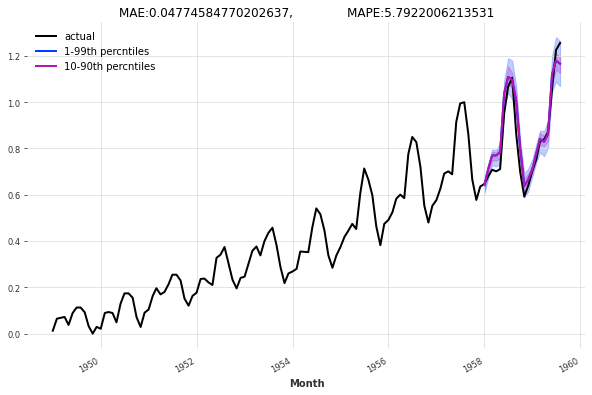

In [ ]:
model_evaluation(tft_model, 20, airpass_ts_sc, ap_val_sc)

# TCN Model

In [ ]:
from darts.models import TCNModel

In [ ]:
tcn_model = TCNModel(
    input_chunk_length = 30,
    output_chunk_length=15,
    kernel_size=3,
    num_filters=3,
    dilation_base=2,
    dropout=0.1,
    likelihood=GaussianLikelihood()
)

In [ ]:
tcn_model.fit(target_train)

[2022-06-19 17:00:49,863] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 236 samples.
[2022-06-19 17:00:49,863] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 236 samples.
2022-06-19 17:00:49 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 236 samples.
[2022-06-19 17:00:49,931] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-06-19 17:00:49,931] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
2022-06-19 17:00:49 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 4
[2022-06-19 17:00:49,945] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-06-19 17:00:49,945] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-06-19 17:00:49 darts.models.forecasting.torch_forecasting_model INFO: Time ser

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

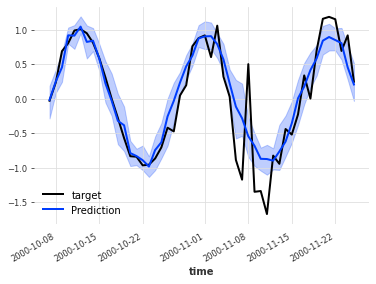

In [ ]:
pred = tcn_model.predict(50, num_samples=50)
target_val.slice_intersect(pred).plot(label="target")
pred.plot(label="Prediction")